In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap
%matplotlib inline
warnings.filterwarnings('ignore')

# for plotting
cmap2 = ListedColormap(['r', 'k'])
cmap4 = ListedColormap(['k', 'r', 'g', 'b'])
plt.rc("font",family="sans-serif",size=20)
plt.rcParams["font.sans-serif"] = "Arial"

In [3]:
from scipy.stats import ortho_group
np.random.seed(0) # for reproducibility

# In A there are four clusters.
N = 400; D = 30; gap=1.5
rotation = ortho_group.rvs(dim=D)

target_ = np.zeros((N, D))
target_[:,0:10] = np.random.normal(0,10,(N,10))
# group 1
target_[0:100, 10:20] = np.random.normal(-gap,1,(100,10))
target_[0:100, 20:30] = np.random.normal(-gap,1,(100,10))
# group 2
target_[100:200, 10:20] = np.random.normal(-gap,1,(100,10))
target_[100:200, 20:30] = np.random.normal(gap,1,(100,10))
# group 3
target_[200:300, 10:20] = np.random.normal(2*gap,1,(100,10))
target_[200:300, 20:30] = np.random.normal(-gap,1,(100,10))
# group 4
target_[300:400, 10:20] = np.random.normal(2*gap,1,(100,10))
target_[300:400, 20:30] = np.random.normal(gap,1,(100,10))
target_ = target_.dot(rotation)
sub_group_labels_ = [0]*100+[1]*100+[2]*100+[3]*100

background_ = np.zeros((N, D))
background_[:,0:10] = np.random.normal(0,10,(N,10))
background_[:,10:20] = np.random.normal(0,3,(N,10))
background_[:,20:30] = np.random.normal(0,1,(N,10))
background_ = background_.dot(rotation)

data_ = np.concatenate((background_, target_))
labels_ = len(background_)*[0] + len(target_)*[1]

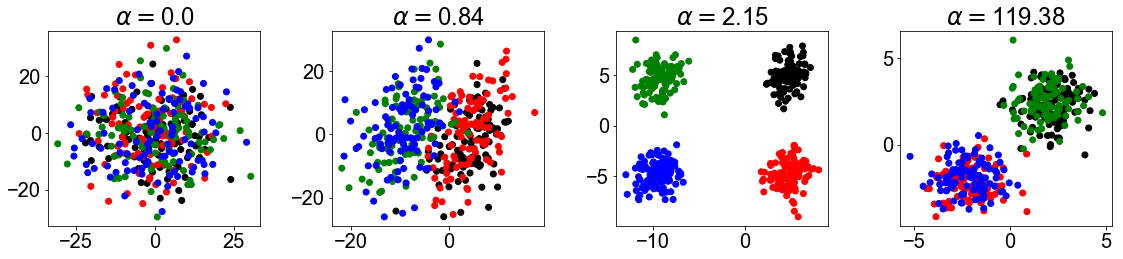

In [20]:
from contrastive import CPCA
mdl = CPCA(standardize=False)

projected_data_,alphas = mdl.fit_transform(target_, background_, plot=False, active_labels=sub_group_labels_,return_alphas=True)
plt.figure(figsize=[16,4])
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.scatter(*projected_data_[i].T,c=sub_group_labels_,cmap=cmap4)
    plt.title(r'$\alpha=$'+str(np.round(alphas[i],2)))
plt.tight_layout()
plt.savefig('synthetic.jpg')